<a href="https://colab.research.google.com/github/KatherineElkins/programming-humanity-2025/blob/main/social_network_analysis_barbie_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Social Network Analysis Demo (Screenplay: Barbie)

Written by K. Elkins Nov 17 2025

--- Centrality Metrics (Top 5) ---
                  Degree Centrality  Betweenness Centrality  \
BARBIE MARGOT              1.083333                0.548007   
KEN RYAN GOSLING           0.375000                0.075181   
BARBIE ALEXANDRA           0.333333                0.216486   
KEN SIMU                   0.291667                0.096316   
BARBIE ISSA                0.291667                0.175423   

                  Eigenvector Centrality  
BARBIE MARGOT                   0.717859  
KEN RYAN GOSLING                0.601040  
BARBIE ALEXANDRA                0.073323  
KEN SIMU                        0.067954  
BARBIE ISSA                     0.051550  

--- Community Detection ---
Modularity Score: 0.201 (Scores above 0.3 often indicate meaningful clustering)
{'Community 1': ['1950 WOMAN', 'BARBIE MARGOT', 'ALLAN', 'KEN RYAN GOSLING', 'BARBIE ANA', 'BARBIE HARI', 'KEN NCUTI', 'RECEPTIONIST', 'SECURITY GUARD', 'WEIRD BARBIE', 'LIFE-GUARD', 'MATTEL CEO'], 'Community 2': ['NERD

/tmp/ipython-input-1390260059.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)


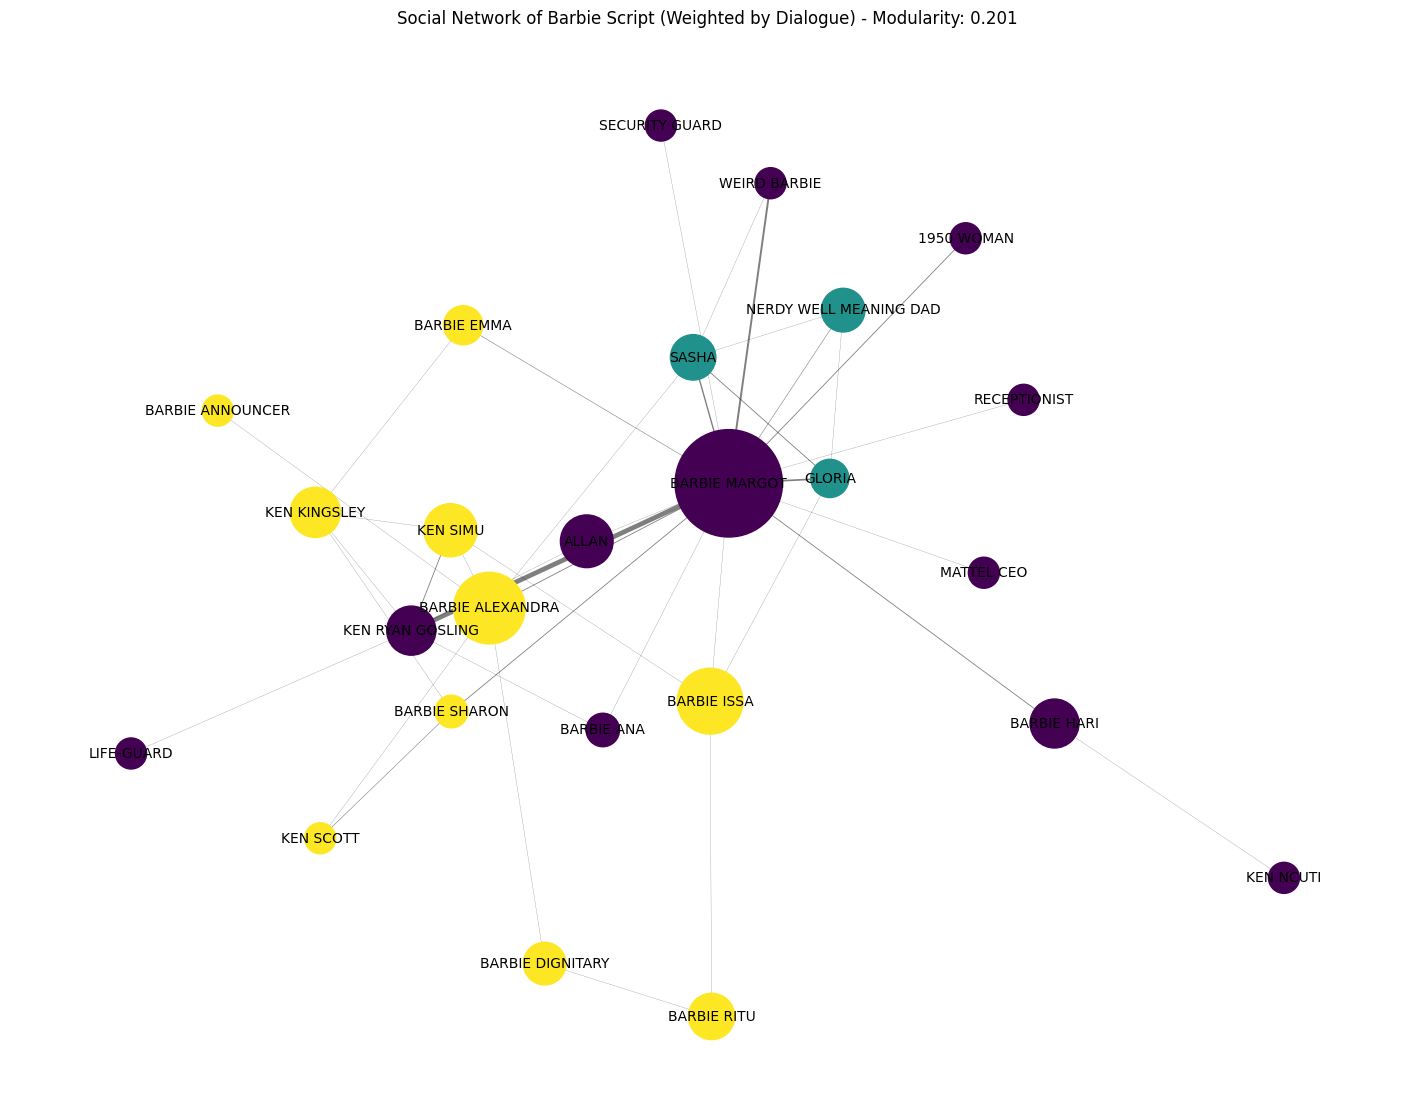

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# --- 1. DATA IMPORT ---
# This dictionary represents the consolidated data (excluding self-loops)


data = {
    'Source_Node': ['BARBIE MARGOT', 'KEN RYAN GOSLING', 'WEIRD BARBIE', 'BARBIE MARGOT', 'GLORIA', 'BARBIE MARGOT', 'SASHA', 'GLORIA', 'SASHA', 'KEN SIMU', 'KEN RYAN GOSLING', 'BARBIE MARGOT', '1950 WOMAN', 'BARBIE MARGOT', 'BARBIE ALEXANDRA', 'BARBIE MARGOT', 'BARBIE EMMA', 'BARBIE MARGOT', 'BARBIE HARI', 'BARBIE MARGOT', 'BARBIE SHARON', 'BARBIE MARGOT', 'BARBIE ANA', 'BARBIE MARGOT', 'BARBIE ISSA', 'BARBIE RITU', 'BARBIE ISSA', 'BARBIE DIGNITARY', 'BARBIE RITU', 'BARBIE DIGNITARY', 'BARBIE ANNOUNCER', 'BARBIE ALEXANDRA', 'BARBIE SHARON', 'KEN SIMU', 'BARBIE HARI', 'KEN NCUTI', 'BARBIE EMMA', 'KEN KINGSLEY', 'BARBIE ALEXANDRA', 'BARBIE SHARON', 'KEN KINGSLEY', 'BARBIE ANA', 'BARBIE MARGOT', 'ALLAN', 'KEN RYAN GOSLING', 'ALLAN', 'KEN KINGSLEY', 'KEN SIMU', 'KEN RYAN GOSLING', 'BARBIE ALEXANDRA', 'BARBIE SHARON', 'BARBIE HARI', 'KEN KINGSLEY', 'WEIRD BARBIE', 'BARBIE MARGOT', 'KEN RYAN GOSLING', 'LIFE-GUARD', 'MATTEL CEO', 'SASHA', 'BARBIE ALEXANDRA', 'SASHA', 'KEN SIMU', 'BARBIE ISSA', 'BARBIE ALEXANDRA', 'GLORIA', 'BARBIE ISSA', 'NERDY WELL MEANING DAD', 'GLORIA', 'SASHA', 'BARBIE MARGOT'],
    'Target_Node': ['KEN RYAN GOSLING', 'BARBIE MARGOT', 'BARBIE MARGOT', 'WEIRD BARBIE', 'BARBIE MARGOT', 'GLORIA', 'BARBIE MARGOT', 'SASHA', 'GLORIA', 'KEN RYAN GOSLING', 'KEN SIMU', '1950 WOMAN', 'BARBIE MARGOT', 'BARBIE ALEXANDRA', 'BARBIE MARGOT', 'BARBIE EMMA', 'BARBIE MARGOT', 'BARBIE HARI', 'BARBIE MARGOT', 'BARBIE SHARON', 'BARBIE MARGOT', 'BARBIE ANA', 'BARBIE MARGOT', 'BARBIE ISSA', 'BARBIE RITU', 'BARBIE ISSA', 'GLORIA', 'BARBIE RITU', 'BARBIE DIGNITARY', 'BARBIE ALEXANDRA', 'BARBIE ALEXANDRA', 'BARBIE ANNOUNCER', 'KEN SCOTT', 'BARBIE ISSA', 'KEN NCUTI', 'BARBIE HARI', 'KEN KINGSLEY', 'BARBIE EMMA', 'KEN SCOTT', 'KEN SCOTT', 'KEN RYAN GOSLING', 'KEN RYAN GOSLING', 'ALLAN', 'BARBIE MARGOT', 'ALLAN', 'KEN RYAN GOSLING', 'KEN SIMU', 'KEN KINGSLEY', 'BARBIE MARGOT', 'BARBIE MARGOT', 'BARBIE MARGOT', 'BARBIE MARGOT', 'BARBIE SHARON', 'BARBIE MARGOT', 'SECURITY GUARD', 'BARBIE MARGOT', 'KEN RYAN GOSLING', 'BARBIE MARGOT', 'BARBIE MARGOT', 'SASHA', 'WEIRD BARBIE', 'BARBIE ISSA', 'KEN SIMU', 'KEN SIMU', 'BARBIE ISSA', 'GLORIA', 'BARBIE MARGOT', 'NERDY WELL MEANING DAD', 'NERDY WELL MEANING DAD', 'RECEPTIONIST'],
    'Weight': [16, 15, 6, 6, 6, 4, 4, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]
}
df = pd.DataFrame(data)

# Aggregate (sum) weights for the final network model
df_agg = df.groupby(['Source_Node', 'Target_Node'])['Weight'].sum().reset_index()

# Create a graph object
G = nx.from_pandas_edgelist(
    df_agg,
    source='Source_Node',
    target='Target_Node',
    edge_attr='Weight',
    create_using=nx.DiGraph # Directed graph since A talking to B is a distinct action from B talking to A
)

# --- 2. CENTRALITY METRICS CALCULATION ---
# Calculate the three key centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight='Weight')
eigenvector_centrality = nx.eigenvector_centrality(G, weight='Weight')

# Combine results into a DataFrame for easy reading and analysis
results_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Eigenvector Centrality': eigenvector_centrality
}).T.sort_values(by='Degree Centrality', axis=1, ascending=False).T

print("--- Centrality Metrics (Top 5) ---")
print(results_df.head(5))

# --- 3. COMMUNITY DETECTION ---
# Using the Louvain algorithm for community detection
from community import community_louvain

# Convert to undirected graph for Louvain (it assumes undirected for clustering)
G_undirected = G.to_undirected()
partition = community_louvain.best_partition(G_undirected, weight='Weight')
modularity = community_louvain.modularity(partition, G_undirected, weight='Weight')

# Print community structure
print("\n--- Community Detection ---")
print(f"Modularity Score: {modularity:.3f} (Scores above 0.3 often indicate meaningful clustering)")
community_map = {node: f"Community {id+1}" for id, nodes in enumerate(set(partition.values())) for node in [n for n, c in partition.items() if c == id]}
community_df = pd.DataFrame.from_dict(community_map, orient='index', columns=['Community']).sort_values(by='Community')
print(community_df.groupby('Community').groups)

# --- 4. VISUALIZATION ---
plt.figure(figsize=(18, 14))

# Use the community partition to color the nodes
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
node_colors = [cmap(partition[node]) for node in G_undirected.nodes()]

# Scale node size by Betweenness Centrality (to visually show importance/bridge role)
node_size = [v * 10000 + 500 for v in betweenness_centrality.values()]

# Draw the graph
pos = nx.spring_layout(G_undirected, k=0.15, iterations=50, seed=42) # Layout for better aesthetics
nx.draw_networkx_nodes(G_undirected, pos, node_size=node_size, node_color=node_colors)
nx.draw_networkx_edges(G_undirected, pos, alpha=0.5, width=[d['Weight']/5 for (u,v,d) in G_undirected.edges(data=True)])
nx.draw_networkx_labels(G_undirected, pos, font_size=10)

plt.title(f"Social Network of Barbie Script (Weighted by Dialogue) - Modularity: {modularity:.3f}")
plt.axis('off')
plt.show()